# Подготовка данных

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('dataset_renamed.xlsx')
df

,id,target,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,60,1.292717,5526.692151,0,274,56,156,249,0,0,...,33,187,3,6,3,6,0,0,1,0
1,50,1.674569,16243.183872,0,0,719,402,0,0,0,...,303,1302,9,12,11,15,0,0,0,1
2,17,1.140666,6401.230357,0,194,425,271,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,1.352501,2255.498620,0,0,0,0,1737,83,0,...,52,315,6,7,5,10,0,0,1,0
4,74,1.324726,5811.209297,0,0,71,0,0,0,0,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,112,NaN,19887.712950,0,0,193,32,0,0,0,...,185,1074,6,6,7,8,0,0,0,1
94,117,NaN,485.615204,0,1258,237,103,372,60,0,...,351,1529,9,10,10,13,0,0,1,0
95,126,NaN,2420.989438,0,146,346,16,20,0,0,...,129,437,8,10,6,14,0,0,1,0
96,144,NaN,11997.377318,0,85,414,547,0,0,0,...,91,309,10,10,9,12,0,0,1,0


In [ ]:
# в связи с огромным датасетом (по колонкам) не решился заполнять пустые значения медианой или ср значением,поэтому просто заменил на 0
df = df.fillna(0)
df.isna().sum().sum()

0

In [ ]:
# разделил датасет на 2 части - на котором будем обучаться и на которое будем делать предсказание
df_test = df[df['target'] == 0]
df_train = df[df['target'] != 0]
df_train 

,id,target,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,60,1.292717,5526.692151,0,274,56,156,249,0,0,...,33,187,3,6,3,6,0,0,1,0
1,50,1.674569,16243.183872,0,0,719,402,0,0,0,...,303,1302,9,12,11,15,0,0,0,1
2,17,1.140666,6401.230357,0,194,425,271,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,15,1.352501,2255.498620,0,0,0,0,1737,83,0,...,52,315,6,7,5,10,0,0,1,0
4,74,1.324726,5811.209297,0,0,71,0,0,0,0,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,94,1.557741,5123.453252,0,12,316,0,0,0,0,...,76,1468,6,6,6,8,0,1,0,0
84,81,1.383704,3238.098609,0,82,477,92,18,0,0,...,87,963,6,5,6,11,0,0,1,0
85,11,1.331065,13175.266371,0,72,170,596,0,0,0,...,200,1426,7,7,6,8,0,0,0,1
86,67,1.257284,19176.051056,0,0,16,0,0,0,0,...,134,1528,7,8,8,11,0,0,0,1


In [ ]:
# посмотрим корреляцию к таргетной переменной
correlations = df_train.corr().iloc[1, 2:].sort_values()
correlations

Среднее количество объектов в категории "Метро_МЦК_ж/д" в радиусе 150м       -0.210499
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 1000м              -0.196034
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 700м               -0.194197
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 300м               -0.192373
Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 300м           -0.191714
                                                                                ...   
Средний средний рейтинг объектов в категории "АЗС" в радиусе 20м                   NaN
Средний средний рейтинг объектов в категории "ВУЗы" в радиусе 20м                  NaN
Средний средний рейтинг объектов в категории "Вокзалы" в радиусе 20м               NaN
Средний средний рейтинг объектов в категории "Жилыедома" в радиусе 20м             NaN
Средний средний рейтинг объектов в категории "Метро_МЦК_ж/д" в радиусе 20м         NaN
Name: target, Length: 2333, dtype: float64

In [ ]:
# выбросим Nan-корреляции
correlations = correlations[:].dropna()
correlations

Среднее количество объектов в категории "Метро_МЦК_ж/д" в радиусе 150м   -0.210499
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 1000м          -0.196034
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 700м           -0.194197
Суммарное кол-во отзывов в категории "Стадионы" в радиусе 300м           -0.192373
Суммарное кол-во отзывов в категории "Пунктывыдачи" в радиусе 300м       -0.191714
                                                                            ...   
Максимальный  пешеходный трафик юзеров в радиусе 500м                     0.450462
Максимальный  пешеходный трафик сигналов в радиусе 1000м                  0.456238
Максимальный  пешеходный трафик сигналов в радиусе 700м                   0.456238
Максимальный дневной пешеходный трафик юзеров в радиусе 500м              0.467708
Максимальный вечерний пешеходный трафик юзеров в радиусе 500м             0.478880
Name: target, Length: 2207, dtype: float64

In [ ]:
# оставим только те столбцы, которые коррелируют большее чем на 0.37 (значение выбиралось опытным путём)
# пробовал также брать все столбцы, но предикт был много хуже
df_correlations = pd.DataFrame(correlations) 
df_correlations = df_correlations.loc[abs(df_correlations['target']) > 0.37]
# По корреляции видно, какие столбцы влияют больше всего
df_correlations

,target
Суммарный дневной трафик юзеров рабочих в радиусе 500м,0.370264
Средний пешеходный трафик сигналов в радиусе 150м,0.371158
Суммарный вечерний трафик юзеров рабочих в радиусе 500м,0.371406
Суммарный пешеходный трафик сигналов в радиусе 150м,0.371572
Суммарное количество объектов в радиусе 150м,0.371701
...,...
Максимальный пешеходный трафик юзеров в радиусе 500м,0.450462
Максимальный пешеходный трафик сигналов в радиусе 1000м,0.456238
Максимальный пешеходный трафик сигналов в радиусе 700м,0.456238
Максимальный дневной пешеходный трафик юзеров в радиусе 500м,0.467708


In [ ]:
print("переменная target больше всего зависит от следующих столбцов: \n")
list(df_correlations.index[100:])

переменная target больше всего зависит от следующих столбцов: 



['Максимальный вечерний пешеходный трафик сигналов в радиусе 150м',
 'Средний дневной пешеходный трафик юзеров в радиусе 140м',
 'Максимальный дневной пешеходный трафик юзеров в радиусе 140м',
 'Суммарный вечерний трафик сигналов рабочих в радиусе 500м',
 'Максимальный  автомобильный трафик сигналов резидентов в радиусе 500м',
 'Средний вечерний пешеходный трафик сигналов в радиусе 140м',
 'Максимальный вечерний пешеходный трафик сигналов в радиусе 140м',
 'Максимальный вечерний пешеходный трафик сигналов в радиусе 500м',
 'Суммарный вечерний пешеходный трафик сигналов в радиусе 140м',
 'Максимальный дневной автомобильный трафик сигналов резидентов в радиусе 500м',
 'Максимальный вечерний пешеходный трафик сигналов в радиусе 700м',
 'Максимальный вечерний пешеходный трафик сигналов в радиусе 1000м',
 'Максимальный  пешеходный трафик сигналов в радиусе 500м',
 'Суммарный вечерний пешеходный трафик юзеров в радиусе 140м',
 'Средний вечерний пешеходный трафик юзеров в радиусе 140м',
 'Мак

In [ ]:
# создадим итоговый датасет для обучения на основе коррелирующих столбцов
df_correlations.index
df_for_train = df_train[df_correlations.index].join(df_train.iloc[:,:2])
df_for_train

,Суммарный дневной трафик юзеров рабочих в радиусе 500м,Средний пешеходный трафик сигналов в радиусе 150м,Суммарный вечерний трафик юзеров рабочих в радиусе 500м,Суммарный пешеходный трафик сигналов в радиусе 150м,Суммарное количество объектов в радиусе 150м,Максимальный дневной пешеходный трафик сигналов в радиусе 500м,"Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 300м",Средний дневной пешеходный трафик сигналов в радиусе 150м,Суммарный утренний автомобильный трафик юзеров рабочих в радиусе 500м,Средний дневной пешеходный трафик сигналов в радиусе 300м,...,Суммарный вечерний пешеходный трафик юзеров в радиусе 140м,Средний вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный пешеходный трафик юзеров в радиусе 500м,Максимальный пешеходный трафик сигналов в радиусе 1000м,Максимальный пешеходный трафик сигналов в радиусе 700м,Максимальный дневной пешеходный трафик юзеров в радиусе 500м,Максимальный вечерний пешеходный трафик юзеров в радиусе 500м,id,target
0,285,5257.636364,207,57834,77,5271,2014,2591.363636,157,1950.870968,...,343,343,343,1451,10430,10430,837,510,60,1.292717
1,286,13370.833333,253,160450,371,24804,7860,7620.916667,139,3977.379310,...,2234,2234,2234,4821,41974,41974,3542,2234,50,1.674569
2,260,3248.083333,184,38977,36,3309,1278,1191.166667,133,999.466667,...,75,75,75,1489,8871,8871,744,491,17,1.140666
3,3574,3250.700000,2324,32507,32,4454,527,1148.800000,1137,988.366667,...,297,297,297,3511,8731,8731,1347,1295,15,1.352501
4,315,3708.750000,250,44505,45,7896,2142,1783.500000,132,1389.862069,...,399,399,399,1900,15695,15695,1279,842,74,1.324726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,185,1044.833333,171,12538,15,1152,111,418.666667,93,348.241379,...,115,115,115,319,5408,5408,179,124,94,1.557741
84,324,6017.916667,217,72215,85,5637,961,2728.250000,181,1840.766667,...,314,314,314,2294,14868,14868,1262,1081,81,1.383704
85,305,5340.700000,254,53407,124,5791,1321,2515.700000,132,1405.233333,...,756,756,756,1969,11438,11438,1204,759,11,1.331065
86,99,7784.100000,74,77841,116,9153,2653,4354.500000,43,2345.212121,...,1212,1212,1212,2916,16100,16100,1955,1212,67,1.257284


In [ ]:
# создадим признаки(X) и метки(Y)
X = df_for_train.iloc[:,:-2]
y = df_for_train.iloc[:,-1:]['target']
df_for_train.iloc[:,:-2]

,Суммарный дневной трафик юзеров рабочих в радиусе 500м,Средний пешеходный трафик сигналов в радиусе 150м,Суммарный вечерний трафик юзеров рабочих в радиусе 500м,Суммарный пешеходный трафик сигналов в радиусе 150м,Суммарное количество объектов в радиусе 150м,Максимальный дневной пешеходный трафик сигналов в радиусе 500м,"Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 300м",Средний дневной пешеходный трафик сигналов в радиусе 150м,Суммарный утренний автомобильный трафик юзеров рабочих в радиусе 500м,Средний дневной пешеходный трафик сигналов в радиусе 300м,...,Максимальный вечерний пешеходный трафик сигналов в радиусе 1000м,Максимальный пешеходный трафик сигналов в радиусе 500м,Суммарный вечерний пешеходный трафик юзеров в радиусе 140м,Средний вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный пешеходный трафик юзеров в радиусе 500м,Максимальный пешеходный трафик сигналов в радиусе 1000м,Максимальный пешеходный трафик сигналов в радиусе 700м,Максимальный дневной пешеходный трафик юзеров в радиусе 500м,Максимальный вечерний пешеходный трафик юзеров в радиусе 500м
0,285,5257.636364,207,57834,77,5271,2014,2591.363636,157,1950.870968,...,2427,10430,343,343,343,1451,10430,10430,837,510
1,286,13370.833333,253,160450,371,24804,7860,7620.916667,139,3977.379310,...,12908,41974,2234,2234,2234,4821,41974,41974,3542,2234
2,260,3248.083333,184,38977,36,3309,1278,1191.166667,133,999.466667,...,1960,7251,75,75,75,1489,8871,8871,744,491
3,3574,3250.700000,2324,32507,32,4454,527,1148.800000,1137,988.366667,...,2402,8516,297,297,297,3511,8731,8731,1347,1295
4,315,3708.750000,250,44505,45,7896,2142,1783.500000,132,1389.862069,...,4619,15695,399,399,399,1900,15695,15695,1279,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,185,1044.833333,171,12538,15,1152,111,418.666667,93,348.241379,...,1083,2814,115,115,115,319,5408,5408,179,124
84,324,6017.916667,217,72215,85,5637,961,2728.250000,181,1840.766667,...,5195,13467,314,314,314,2294,14868,14868,1262,1081
85,305,5340.700000,254,53407,124,5791,1321,2515.700000,132,1405.233333,...,3365,11438,756,756,756,1969,11438,11438,1204,759
86,99,7784.100000,74,77841,116,9153,2653,4354.500000,43,2345.212121,...,4881,16100,1212,1212,1212,2916,16100,16100,1955,1212


In [ ]:
# разделим датасет на обучающую и тестовую выборки в соотношении 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Test Learning**

In [ ]:
# метрики основные
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, max_error, mean_absolute_percentage_error, SCORERS
# основные линейные модели
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
# для отображения графиков
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 10, 7.5    # Стандартные размеры графиков
plt.rcParams['axes.grid'] = True            # Сетка графика
plt.pink()             

<Figure size 720x540 with 0 Axes>

In [ ]:
# название метрик для передачи в параметры GridSearch
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [ ]:
# метод для обучения
# на вход: 
# модель, обучающая выборка, параметры для GridSearch,
# количествой разделений на кросс-валидацию, 
# используем ли метод для окончательного предсказания (если да, то на выходе получим обученную модель для предсказания)
def traning_model(model, X_train, y_train, params, cvn=8, predict=False):
  
  grid_search = GridSearchCV(model, param_grid=params, cv=cvn, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

  # обучаем
  grid_search.fit(X_train, y_train)

  # берём предикты
  preds = grid_search.predict(X_test)

  # смотрим на лучшие параметры
  print(grid_search.best_estimator_)

  # разделение для случаев, 
  # 1) когда мы готовы использовать модель для окончательного предсказания
  # 2) когда мы тестируем модели
  if predict:
    # метрика на обучающей выборке
    print(f'train_mean_absolute_percentage_error: {abs(grid_search.best_score_)}')
    # возвращаем модель для окончательного предсказания
    return grid_search
  else:
    # выводим что показывают метрики
    print(f'max_error: {max_error(preds, y_test)}')
    print(f'train_mean_absolute_percentage_error: {abs(grid_search.best_score_)}')
    print(f'test_mean_absolute_percentage_error: {mean_absolute_percentage_error(preds, y_test)}')
    
    # отрисовываем графики
    plt.scatter(preds, y_test, 
                c = 'b', label = 'Y to preds'
                )
    plt.plot(preds, preds, 
            c = 'r', label = 'pred-pred line'
            )
    
    plt.xlabel("Predictions")
    plt.ylabel("True values")
    plt.title("Linear model approximation of test data")
    plt.legend()
    plt.show()
    print('_________________________')

# LinearRegression, Ridge and Lasso models

*Попробовал Ridge, Lasso и обычную линейную регрессию, потом Ridge убрал, потому что он давал примерно те же результаты как линейная регрессия*

LinearRegression()
max_error: 1.2037759450330723
train_mean_absolute_percentage_error: 0.39402312024399266
test_mean_absolute_percentage_error: 0.6816395761577511


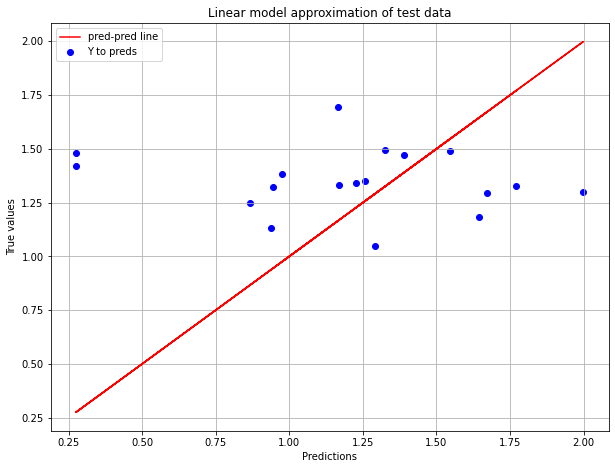

_________________________
Lasso(alpha=0.5, max_iter=600, tol=1)
max_error: 0.2684030961324626
train_mean_absolute_percentage_error: 0.1119453045882972
test_mean_absolute_percentage_error: 0.06967541927769942


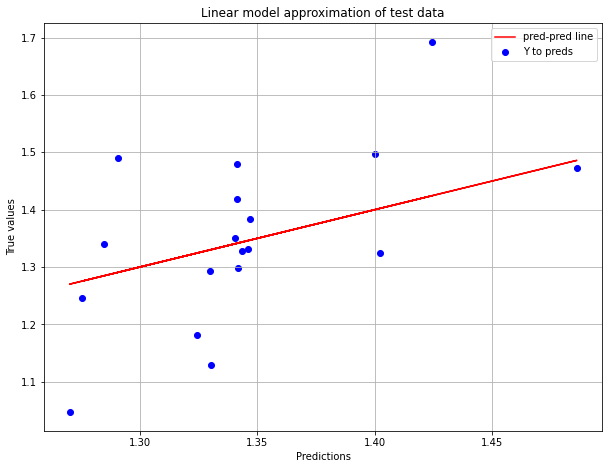

_________________________


In [ ]:
traning_model(LinearRegression(), 
              X_train, y_train,
              {}
              )

traning_model(Lasso(), 
              X_train, y_train,
              {'alpha': [1.0, 0.5, 0.1, 0.01, 0.001, 0.00001],
               'max_iter': [600, 800, 1000],
               'tol': [1]}
              )

# Catboost and Trees

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model_CBR = CatBoostRegressor(silent=True)

max_error: 0.46823440827018437
train_mean_absolute_percentage_error: 0.09648512399936433
test_mean_absolute_percentage_error: 0.08336003074262426


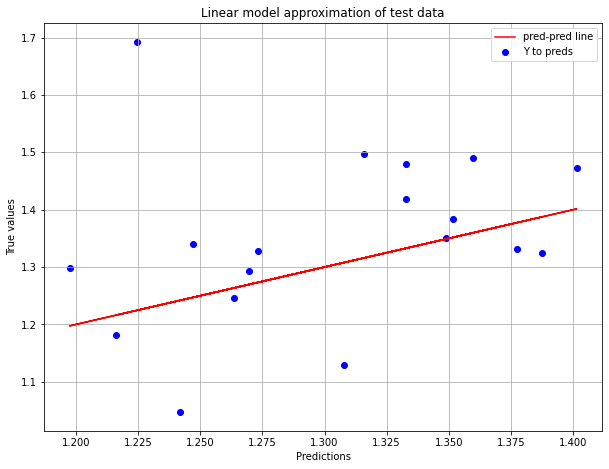

_________________________


In [ ]:
traning_model(model_CBR, 
              X_train, y_train,
              {'iterations':[500, 100],
               'objective':[None, 'Poisson'],}
              )

**Заключение по catboost**: я попробовал его с разными оптимизаторами, с только сильно коррелирующими колонками и нет, результат чуть хуже чем у Лассо

In [ ]:
from sklearn import tree
from sklearn import ensemble

In [ ]:
model_DT_regr = tree.DecisionTreeRegressor()
model_RF_regr = ensemble.RandomForestRegressor()

DecisionTreeRegressor(min_samples_split=10)
max_error: 0.34796790927467636
train_mean_absolute_percentage_error: 0.13117584139785018
test_mean_absolute_percentage_error: 0.12904964915366016


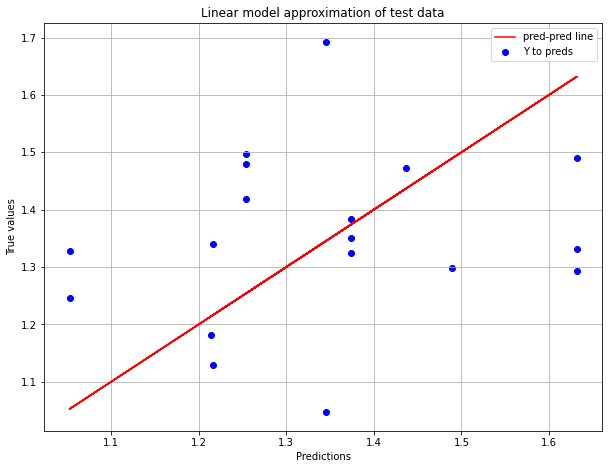

_________________________


array([1.21596957, 1.63180764, 1.21461614, 1.43635251, 1.21596957,
       1.34486548, 1.05263833, 1.34486548, 1.37405046, 1.25426905,
       1.63180764, 1.05263833, 1.25426905, 1.48942076, 1.37405046,
       1.63180764, 1.37405046, 1.25426905])

In [ ]:
traning_model(model_DT_regr, 
              X_train, y_train,
              {'min_samples_split':[2, 5, 10]}
              )

RandomForestRegressor(max_depth=2, max_features='log2', n_estimators=700)
max_error: 0.3406875172734134
train_mean_absolute_percentage_error: 0.09959549391329618
test_mean_absolute_percentage_error: 0.06396807886757053


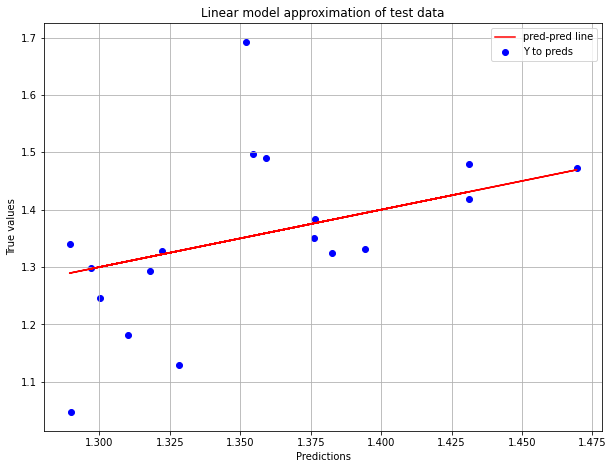

_________________________


array([1.32827908, 1.3179481 , 1.31019951, 1.469475  , 1.28940433,
       1.28974973, 1.32222365, 1.35214587, 1.38252575, 1.43114815,
       1.39431929, 1.30008616, 1.43114815, 1.29714534, 1.37665505,
       1.35902198, 1.37605512, 1.3546112 ])

In [ ]:
traning_model(model_RF_regr, 
              X_train, y_train,
              {'n_estimators': [700, 500],
               'max_depth': [2, 7],
               'max_features': ['sqrt','log2'],
               }
              )

In [ ]:
list(y_test)

[1.129976385745981,
 1.292716724867408,
 1.181458113489836,
 1.473473285919767,
 1.340775176841415,
 1.046956724578759,
 1.327713604631072,
 1.69283339180128,
 1.324725780342087,
 1.418452212202624,
 1.331064632522841,
 1.246310872933605,
 1.478997935526943,
 1.298727173618073,
 1.383704080293197,
 1.490306309242422,
 1.349870705405091,
 1.4968345677213]

**По итогу лучшими были Лассо и Рандомфорест**

# Выбор между Лассо и Рандомфорест для окончательного обучения и предикта

In [ ]:
res_model_RFR = ensemble.RandomForestRegressor()
res_RFR = traning_model(res_model_RFR,
                        X, y,
                        {'n_estimators': [700],
                        'max_depth': [2],
                        'max_features': ['sqrt','log2'],},
                        cvn=10,
                        predict=True
                        )

RandomForestRegressor(max_depth=2, max_features='sqrt', n_estimators=700)
train_mean_absolute_percentage_error: 0.0906443837272021


In [ ]:
res_model_lasso = Lasso()
res_lasso = traning_model(res_model_lasso,
                        X, y,
                        {'alpha': [1.0, 0.5, 0.1, 0.01, 0.001, 0.00001],
                         'max_iter': [600, 800, 1000],
                         'tol': [1]},
                        cvn=10,
                        predict=True
                        )

Lasso(max_iter=600, tol=1)
train_mean_absolute_percentage_error: 0.10466343896738126


**Т.к. у RandomForestRegressor MAPE оказался меньше на 0.01, то для окончательного предикта берём его**

In [ ]:
# ранее мы создали датафрейм для того, что будем предсказывать,теперь уберём из него столбцы с низкой корреляцией
df_for_predict = df_test.iloc[:,:2].join(df_test[df_correlations.index])
df_for_predict

,id,target,Суммарный дневной трафик юзеров рабочих в радиусе 500м,Средний пешеходный трафик сигналов в радиусе 150м,Суммарный вечерний трафик юзеров рабочих в радиусе 500м,Суммарный пешеходный трафик сигналов в радиусе 150м,Суммарное количество объектов в радиусе 150м,Максимальный дневной пешеходный трафик сигналов в радиусе 500м,"Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 300м",Средний дневной пешеходный трафик сигналов в радиусе 150м,...,Максимальный вечерний пешеходный трафик сигналов в радиусе 1000м,Максимальный пешеходный трафик сигналов в радиусе 500м,Суммарный вечерний пешеходный трафик юзеров в радиусе 140м,Средний вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный вечерний пешеходный трафик юзеров в радиусе 140м,Максимальный пешеходный трафик юзеров в радиусе 500м,Максимальный пешеходный трафик сигналов в радиусе 1000м,Максимальный пешеходный трафик сигналов в радиусе 700м,Максимальный дневной пешеходный трафик юзеров в радиусе 500м,Максимальный вечерний пешеходный трафик юзеров в радиусе 500м
88,3,0.0,237,16295.272727,164,179248,343,25351,7361,8787.363636,...,14931,48475,1730,1730,1730,6054,48475,48475,4172,2840
89,25,0.0,255,3068.700000,207,30687,32,5481,145,1318.100000,...,2989,10872,149,149,149,1395,10872,10872,899,590
90,55,0.0,326,9589.000000,227,115068,149,16130,3971,4131.000000,...,9158,29699,464,464,464,4286,29699,29699,2512,1641
91,69,0.0,206,14450.222222,151,130052,285,16221,6799,7866.333333,...,10269,29543,1756,1756,1756,3691,29543,29543,2563,1756
92,109,0.0,190,1785.250000,163,21423,18,3741,39,712.833333,...,2714,10710,38,38,38,2493,10710,10710,1047,831
93,112,0.0,91,9216.636364,69,101383,148,10055,1672,4925.272727,...,5839,18818,941,941,941,2522,18818,18818,1770,1088
94,117,0.0,305,5381.181818,194,59193,87,6787,436,2217.545455,...,5277,17363,882,882,882,3686,17363,17363,1744,1420
95,126,0.0,401,4988.250000,280,59859,40,6335,402,2156.000000,...,6977,16120,661,661,661,3821,17733,17733,1855,1503
96,144,0.0,339,6554.727273,289,72102,75,4589,655,2463.545455,...,4074,12142,848,848,848,2080,12142,12142,1061,848
97,145,0.0,417,3132.181818,313,34454,19,8391,54,1484.636364,...,3321,13232,134,134,134,2161,13388,13388,1454,668


In [ ]:
# предскажем
X_for_predict = df_for_predict.iloc[:,2:]
res_predicts = list(res_RFR.predict(X_for_predict))
res_predicts

[1.5870816841239528,
 1.2889886660354972,
 1.443063508907119,
 1.480798552110182,
 1.3341154072754169,
 1.4199993001126676,
 1.398932971987887,
 1.4038361787455345,
 1.4141625976071617,
 1.3505405639151764]

In [ ]:
# создадим результрующий датафрейм
result = df_for_predict.iloc[:,:1].reset_index(drop=True)
result = result.join(pd.DataFrame({"predict": res_predicts}))
result

,id,predict
0,3,1.587082
1,25,1.288989
2,55,1.443064
3,69,1.480799
4,109,1.334115
5,112,1.419999
6,117,1.398933
7,126,1.403836
8,144,1.414163
9,145,1.350541
